<a href="https://colab.research.google.com/github/stepsbtw/Statistics-Inference-AI-and-ML/blob/main/GCC1625_T1_CAIO_PASSOS_TORKST_FERREIRA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1) Páginas de livros didáticos
Considere uma população de **livros didáticos** com aproximadamente o mesmo tamanho físico. Nessa população, considere que a característica (isto é, a variável) de interesse é a quantidade de páginas contida em cada livro. Sendo assim, a população subjacente corresponde a um conjunto de valores numéricos inteiros positivos (correspondentes à quantidade de páginas de cada livro).

Nesta parte do trabalho, você irá abordar a situação descrita acima como um problema de **Probabilidade**, e não como um problema de Estatística. Em um problema de Probabilidade, normalmente supõe-se que é conhecida a distribuição da população (o que não acontece em um problema de Estatística). Assim, considere que a variável aleatória correspondente é a quantidade de páginas em um livro da população, e que essa variável segue uma **distribuição uniforme discreta** nos inteiros de 150 até 300. Isso significa que um livro pode ter no mínimo 150 e no máximo 300 páginas, com igual **probabilidade** para qualquer quantidade de páginas nesse intervalo.

(i) Esboce um gráfico (histograma) da distribuição da população com relação à característica quantidade de páginas. Dica: observe que esta população é modelada por uma **distribuição discreta uniforme.**

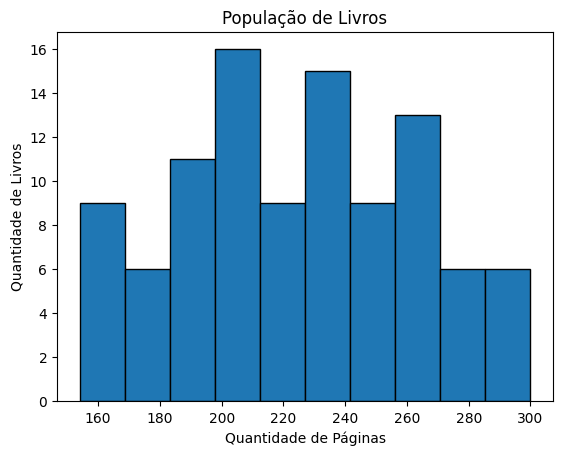

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

page_min = 150
page_max = 300
population_size = 100

rng = np.random.default_rng()
population_pages = rng.integers(page_min, page_max+1, size=population_size) # distribuicao uniforme de inteiros.

plt.hist(population_pages, edgecolor="black")
plt.title("População de Livros")
plt.xlabel("Quantidade de Páginas")
plt.ylabel("Quantidade de Livros")
plt.show()

(ii) Encontre a média (μ), a variância (σ²) e o desvio padrão (σ) da distribuição da população. Dica: use as fórmulas da distribuição uniforme discreta.

In [ ]:
mean = (page_min + page_max)/2
var = ((page_max - page_min + 1)**2 - 1) / 12
std = np.sqrt(var)

print(f"Média Populacional : μ = {mean}")
print(f"Variância Populacional : σ² = {var}")
print(f"Desvio Padrão Populacional : σ = {std}")

Média Populacional : μ = 225.0
Variância Populacional : σ² = 1900.0
Desvio Padrão Populacional : σ = 43.58898943540674


(iii) Considere que o plano amostral utilizado é uma **amostragem aleatória simples com reposição** (simple random sample with replacement). Considere tomar **amostras de tamanho 2** dessa população e calcular a **média de cada amostra**. Para cada amostra, você terá uma estatística pontual (a média amostral x). Ao gerar **todas** as possíveis amostras aleatórias de tamanho 2, a distribuição de todas essas médias constitui a **distribuição amostral da média** (sampling distribution of the sample mean) para n = 2.

- Primeiro, implemente uma função que gere todas as possíveis amostras de tamanho 2 com reposição, e compute a média de cada uma. Por exemplo, para as amostras (200, 200) e (300, 250), as médias seriam 200 e 275, respectivamente. Note que diferentes amostras podem produzir a mesma média (como, por exemplo, (250, 300), (275, 275), (280, 270), etc.).

- Em seguida, usando os valores das médias obtidas, esboce um histograma da distribuição amostral da média.

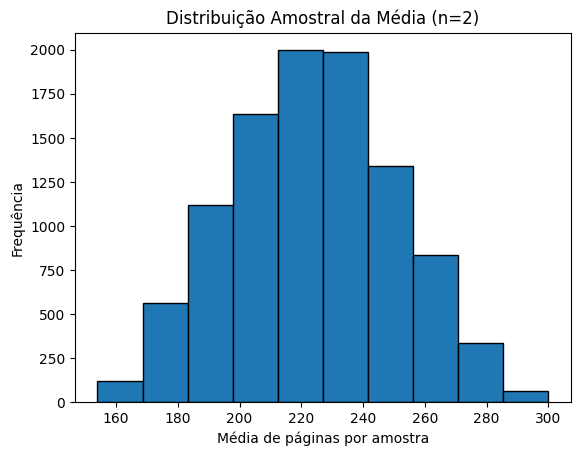

In [ ]:
import itertools

sample_size = 2

# distribuicao amostral teorica
def sampling_means(population):
  # samples =
  samples = list(itertools.product(population, repeat=2)) # n^2
  return [(x1 + x2)/2 for x1, x2 in samples]

sample_means = sampling_means(population_pages)

plt.hist(sample_means, edgecolor="black")
plt.title("Distribuição Amostral da Média (n=2)")
plt.xlabel("Média de páginas por amostra")
plt.ylabel("Frequência")
plt.show()


(iv) Calcule a **média** (μx), a **variância** (σ²x) e o **desvio padrão** (σx) da
distribuição amostral obtida no item anterior.
Dica: use as funções mean e var da sua linguagem de programação
preferida (como Python ou R).

In [ ]:
sampling_dist_mean = np.mean(sample_means)
sampling_dist_var = np.var(sample_means)
sampling_dist_std = np.std(sample_means)

print(f"Média da Distribuição Amostral da Média : μx = {mean}")
print(f"Variância da Distribuição Amostral da Média : σ²x = {var}")
print(f"Desvio Padrão da Distribuição Amostral da Média : σx = {std}")

Média da Distribuição Amostral da Média : μx = 225.0
Variância da Distribuição Amostral da Média : σ²x = 1900.0
Desvio Padrão da Distribuição Amostral da Média : σx = 43.58898943540674


(v) O **Teorema Central do Limite** fornece expressões teóricas para os
valores esperados da média e do desvio padrão da distribuição amostral
da média x. Use essa teoria e os valores do item (ii) para calcular esses
parâmetros no caso de n = 2, e compare com os resultados obtidos no
item (iv).

In [ ]:
# pelo CLT, quanto n->inf:
sampling_dist_mean = mean
sampling_dist_std = std/np.sqrt(sample_size)

print(f"Pelo CLT -> μx = μ : {sampling_dist_mean}")
print(f"Pelo CLT -> σx = σ/sqrt(n) : {sampling_dist_std}")

Pelo CLT -> μx = μ : 225.0
Pelo CLT -> σx = σ/sqrt(n) : 30.822070014844883


(vi) Agora, suponha que desejamos estudar a distribuição amostral da média para amostras de tamanho n = 9.

a) Quantas amostras diferentes de tamanho 9 podem ser geradas a
partir da população? Essa tarefa é viável de ser feita manualmente ou com auxílio computacional?

In [ ]:
population_size**9

1000000000000000000

Não é viável manualmente, e nem computacionalmente. (Talvez um dia, com computadores quânticos.)

(b) Gere uma distribuição amostral empírica da média (uma aproximação da distribuição teórica) para n = 9.
Dica: gere uma grande quantidade de amostras aleatórias e construa um histograma com as médias amostrais obtidas.

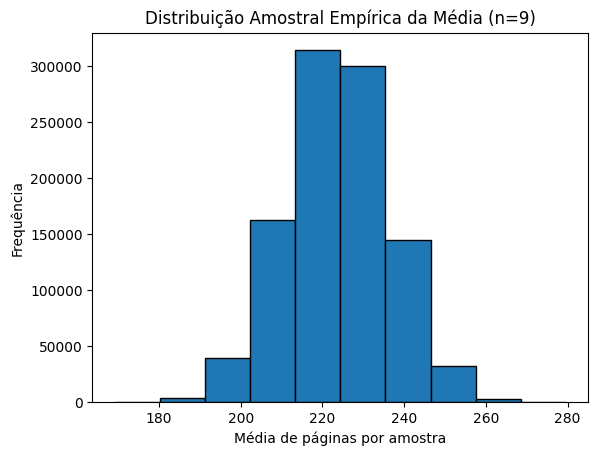

Média da distribuição, aproximadamente a Populacional = 223.80666388888883
Desvio Padrão da distribuição = 12.549477604591374
Desvio Padrão estimado da População = 37.64843281377412


In [ ]:
n = 9
N = 1000000

#samples = [rng.choice(population_pages,size=n) for _ in range(N)]
#sample_means = [np.mean(sample) for sample in samples]
samples = rng.choice(population_pages, size=(N,n), replace=True)
sample_means = samples.mean(axis=1)

plt.hist(sample_means, edgecolor="black")
plt.title("Distribuição Amostral Empírica da Média (n=9)")
plt.xlabel("Média de páginas por amostra")
plt.ylabel("Frequência")
plt.show()

sampling_dist = sample_means.mean()
sampling_std = sample_means.std()

estimated_std = sampling_std * np.sqrt(n)
print(f"Média da distribuição, aproximadamente a Populacional = {sampling_dist}")
print(f"Desvio Padrão da distribuição = {sampling_std}")
print(f"Desvio Padrão estimado da População = {estimated_std}")

#2) Problema dos tanques alemães
Durante um conflito fictício, o serviço de inteligência de um país deseja estimar a quantidade total de veículos blindados produzidos por um país adversário. Esses veículos são numerados sequencialmente a partir de 1 (por exemplo: 1, 2, 3, ..., N ), e alguns deles foram capturados no campo de
batalha.

Suponha que foram capturados aleatoriamente k = 5 tanques com os
seguintes números de série:
{17, 32, 45, 59, 88}

**Objetivo:** estimar o número total N de tanques produzidos pelo inimigo,
usando métodos estatísticos apropriados.

(i) Apresente uma estimativa pontual de N com base na amostra coletada,
usando o seguinte estimador clássico:

𝑁̂ = 𝑀 + (𝑀/𝑘) -1

onde M é o maior número observado na amostra, e k é o tamanho da
amostra.

In [ ]:
sample = [17,32,45,59,88]
M = max(sample)
k = len(sample)
N_hat = M + (M/k) -1

print(int(N_hat))

104


(ii) Implemente (ou descreva) uma simulação computacional que reproduza
o processo de amostragem aleatória de 𝑘 = 5 tanques a partir de uma
população com N = 100 tanques numerados sequencialmente. Repita
esse processo muitas vezes (por exemplo, 10.000 vezes) e registre as
estimativas 𝑁̂ em cada simulação.

In [ ]:
import numpy as np

N_tanks = 100
k = 5 # size of sample
N_samples = 10000

tanks_population = np.arange(1,N_tanks+1)

rng = np.random.default_rng()

#samples = [rng.choice(tanks_population, k) for _ in range(N_samples)]
samples = rng.choice(tanks_population, size=(N_samples,k))

M = samples.max(axis=1)
N_hats = M + (M/k) -1

(iii) Construa um histograma com as estimativas obtidas na simulação do
item anterior e analise o comportamento do estimador 𝑁̂. Ele é viesado? Subestima ou superestima frequentemente o verdadeiro valor de
𝑁 ?

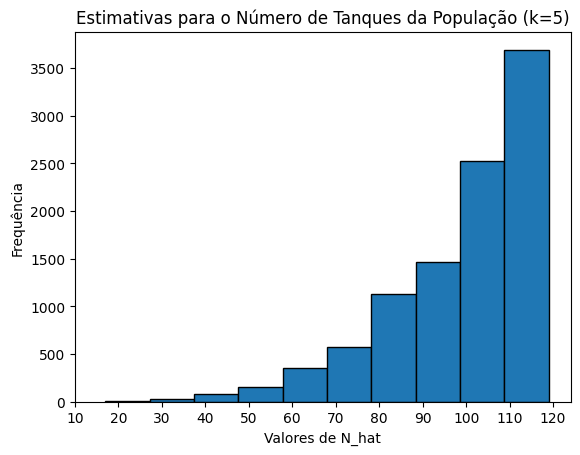

In [ ]:
plt.hist(N_hats,edgecolor="black")
plt.title("Estimativas para o Número de Tanques da População (k=5)")
plt.xlabel("Valores de N_hat")
plt.xticks(range(10,130,10))
plt.ylabel("Frequência")
plt.show()

O estimador 𝑁̂ é viesado, assimétrico para a direita. Frequentemente superestima o valor de 𝑁, grande parte das amostras apresentaram um valor entre entre (110,120)

(iv) Calcule a média, a variância e o desvio padrão das estimativas geradas pela simulação. Compare com o valor real de N = 100 e discuta os
resultados.

In [ ]:
print(f"Média: {N_hats.mean()}")
print(f"Variância: {N_hats.var()}")
print(f"Desvio Padrão: {N_hats.std()}")

Média: 99.26924
Variância: 289.95907782240005
Desvio Padrão: 17.02818480703096


A média das estimativas 𝑁̂ geradas pela simulação representa muito bem o valor da população.

Porém com um alto desvio padrão, significa que os valores das amostras variam bastante.

Teóricamente o estimador pode ser bem enviesado, mas como utilizamos um grande número de amostras (10000), empiricamente de acordo com a **Lei dos grandes números** a média dos resultados observados tende a se aproximar da média teórica (valor esperado).

(v) Agora, repita a simulação para diferentes tamanhos de amostra (k =
2, 5, 10, 20). Como o tamanho da amostra influencia a qualidade da
estimativa de N ?

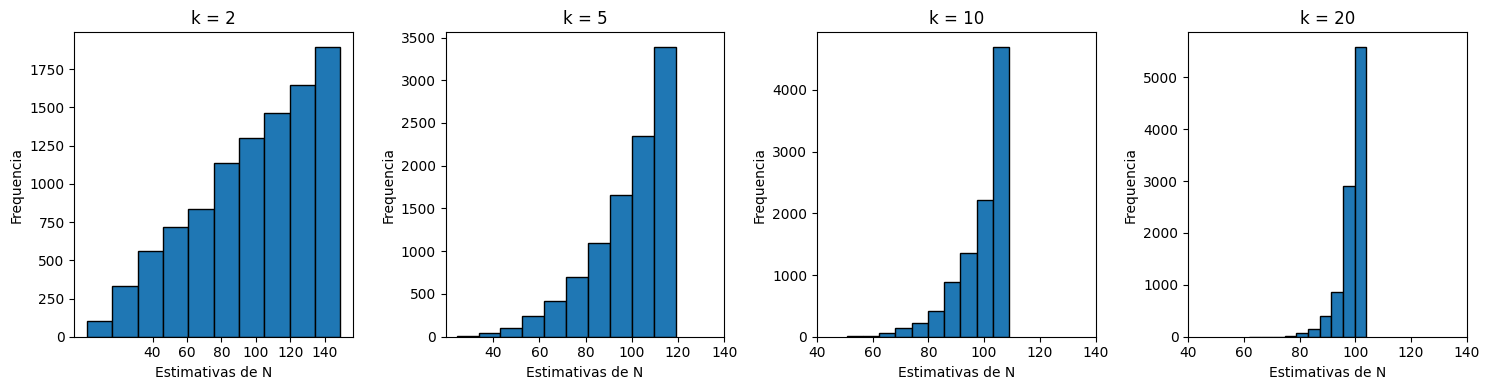

In [ ]:
k_vals = [2,5,10,20]
samples = [rng.choice(tanks_population, size=(N_samples,k)) for k in k_vals]
M_vals = [sample.max(axis=1) for sample in samples]

#N_hats = [M_vals[i] + M_vals[i]/k_vals[i] -1 for i in range(len(k_vals))]
N_hats = [(M + M/k -1) for M, k in zip(M_vals, k_vals)]

fig, axs = plt.subplots(1,len(k_vals),figsize=(15,4))
for i in range(len(k_vals)):
  axs[i].hist(N_hats[i],edgecolor="black")
  axs[i].set_title(f"k = {k_vals[i]}")
  axs[i].set_xlabel("Estimativas de N")
  axs[i].set_ylabel("Frequencia")
  axs[i].set_xticks(range(40,150,20))

plt.tight_layout()
plt.show()

É notório que, ao aumentar o tamanho das amostras, o desvio padrão diminui, os dados ficam mais concentrados ao redor de 𝑁 . E novamente, de acordo com a **Lei dos Grandes Números**, quanto mais informações presente nas nossas estimativas (maiores amostras) mais os valores se aproximam da média esperada da população.

(vi) Proponha um intervalo de confiança para N com base nas simulações.
Discuta se o verdadeiro valor (N = 100) costuma estar dentro do intervalo estimado.

In [ ]:
# INTERVALO DE CONFIANCA PARA TAMANHO DE AMOSTRAS PEQUENAS n<30 !

sampling_dist_mean = [np.mean(N_hat) for N_hat in N_hats]
sampling_dist_std = [np.std(N_hat) for N_hat in N_hats]

for i in range(len(k_vals)):
  print(f"Tamanho da amostra k = {k_vals[i]}")
  print(f"Média das estimativas de N = {sampling_dist_mean[i]}")
  print(f"Desvio Padrao das estimativas de N = {sampling_dist_std[i]}\n")

Tamanho da amostra k = 2
Média das estimativas de N = 99.22445
Desvio Padrao das estimativas de N = 35.465645309193235

Tamanho da amostra k = 5
Média das estimativas de N = 99.36836000000001
Desvio Padrao das estimativas de N = 16.987139809585365

Tamanho da amostra k = 10
Média das estimativas de N = 99.55738
Desvio Padrao das estimativas de N = 9.221537590640727

Tamanho da amostra k = 20
Média das estimativas de N = 99.51944
Desvio Padrao das estimativas de N = 4.7722244903608635



(vii) Contextualização histórica: Pesquise brevemente como esse problema
foi utilizado durante a Segunda Guerra Mundial. Comece sua pesquisa
pela entrada correspondente na Wikipedia. Quais foram as conclusões
reais tiradas a partir dos números de série? Comente a importância
histórica da inferência estatística nesse contexto

### resposta aqui

#3) Diferença de médias
Considere que um pesquisador tenha desenvolvido um medicamento que supostamente melhora a memória. Considere duas populações hipotéticas: o
desempenho das pessoas em um teste de memória se elas tiverem tomado o
medicamento e o desempenho das pessoas se não tiverem. Suponha que a
média (μ1) e a variância (σ²1) da distribuição das pessoas que tomam o medicamento sejam 50 e 25, respectivamente, e que a média (μ2) e a variância (σ²2) da distribuição das pessoas que não tomam o medicamento sejam 40 e 24, respectivamente. Segue-se que o medicamento, em média, melhora o desempenho no teste de memória em 10 pontos. Essa melhora de 10 pontos é para toda a população. Agora, considere a distribuição amostral da diferença entre as médias. Essa distribuição pode ser entendida pensando no seguinte plano amostral:

1. Produzir uma amostra de n1 escores da população de pessoas que tomam o medicamento e computar a média. Essa média será designada
como M1.

In [ ]:
import numpy as np
# populacao q toma o medicamento
mean_1 = 50
var_1 = 25
std_1 = np.sqrt(var_1)

# amostra
sample_size = 30
rng = np.random.default_rng()
sample_1 = rng.normal(loc=mean_1,scale=std_1,size=sample_size)
M1 = sample_1.mean()
print(sample_1)
print(M1)

[44.99530773 47.81550856 40.04139031 51.06691637 36.44014533 48.50158638
 52.42821863 61.13663443 42.71158078 53.01564148 50.939963   43.59230227
 53.45955071 57.91714777 50.25435736 53.94328781 51.79585419 61.94036878
 47.97282279 49.66431674 42.23231016 45.02602209 56.53627396 44.87497547
 49.30747207 43.92684396 54.32275847 56.32830233 49.81338895 39.57904915]
49.38600993436453


2. Em seguida, produzir uma amostra de n2 escores da população de pessoas que não tomam o medicamento e computar a média. Essa média será designada como M2.

In [ ]:
mean_2 = 40
var_2 = 24
std_2 = np.sqrt(var_2)

sample_2 = rng.normal(loc=mean_2, scale=std_2, size=sample_size)
M2 = sample_2.mean()
print(sample_2)
print(M2)

[36.89905712 39.46149106 30.70302428 49.04489146 38.50158882 39.2302525
 42.61485624 41.03471076 33.79543565 36.32416873 36.58121989 42.44197826
 42.37780564 45.45453613 33.24919923 36.6652471  41.09559445 40.5313816
 49.86641792 42.34125792 39.15279605 39.71202293 36.71389173 27.66494369
 31.12353186 32.0308659  33.62125325 43.99632217 40.08675116 41.595287  ]
(30,)
38.79705935038676


3. Calcular a diferença entre M1 e M2. Essa diferença será chamada de
Md, onde o d significa “diferença”. Esta é o estatística cuja distribuição
amostral é de interesse.

In [ ]:
Md = M1-M2 #interesse
print(Md)

10.590395997204425


A distribuição amostral pode ser aproximada repetindo o plano amostral
acima várias vezes e plotando os valores de Md. A distribuição de frequência (histograma) resultante seria uma aproximação da distribuição amostral. A média (μMd ) e a variância (σ²Md ) da distribuição amostral de Md são:

- μMd = μ1 − μ2
- σ²Md = σ²1/n1 + σ²2/n2

(i) Utilizando o plano amostral descrito acima, produza um histograma
que aproxima a distribuição amostral de Md. Dica: repita os passos
do plano amostra descrito 10000 vezes. Em seguida, crie o histograma
solicitado com os 10000 valores produzidos.

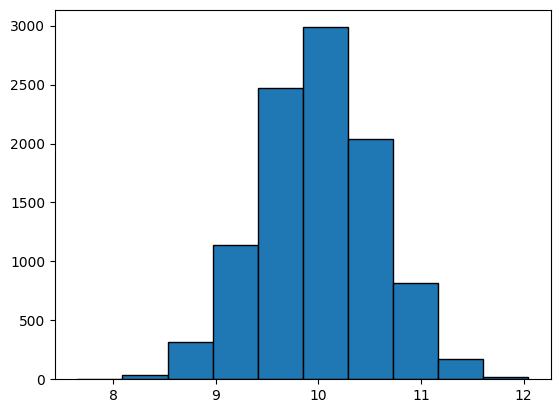

In [ ]:
N_samples = 10000
# n1 = n2 = sample_size = 30
samples = rng.normal(loc=mean_1-mean_2, scale=np.sqrt(std_1/len(sample_1) + std_2/len(sample_2)), size=N_samples)
plt.hist(samples, edgecolor="black")
plt.ylabel("Frequencia")
plt.xlabel("Diferença entre as medias")
plt.show()

(ii) Usando a aproximação da distribuição amostral de Md obtida no item
anterior, compute aproximações para a média e o desvio padrão dessa
estatística. Os valores que você obteve são próximos aos fornecidos
acima? Explique

In [ ]:
Md_mean = samples.mean()
Md_std = samples.std()

print(f"Média da distribuição amostral = {Md_mean}")
print(f"Desvio Padrão da distribuição amostral = {Md_std}")

Média da distribuição amostral = 10.001743578452155
Desvio Padrão da distribuição amostral = 0.5671979774537929


Sim, a média da distribuição amostral se aproxima da diferença em 10 que o medicamento faz no desempenho.

O desvio padrão baixo também mostra o quão concentrado é a estimativa.

(iii) Uma vez conhecidos a média e o erro padrão da distribuição amostral de uma estatística, é possível responder a diversas perguntas. Para o caso
da estatística aqui mencionada (diferença entre as médias), responda
a seguinte pergunta: Se um experimento com o medicamento para a
memória descrito for realizado, qual é a probabilidade de a média do
grupo de 10 sujeitos que receberam o medicamento ser 15 ou mais pontos
maior do que a média dos 8 sujeitos que não receberam o medicamento?

In [ ]:
# z => ponto que delimita a area, a PROBABILIDADE!
# z_score => quantos desvios padroes da media
# "STANDARDIZATION!"

n1 = 10
n2 = 8
# prob(mean_1 - mean_2 >= 15)

z =


#4 Áudio ou texto?
Imagine que você seja um candidato a emprego tentando apresentar suas habilidades a um recrutador em um processo seletivo de uma empresa. Em qual das duas condições abaixo você teria mais chances de conseguir o emprego?

- você grava um áudio com um breve discurso descrevendo suas habilidades para o recrutador;
- você escreve um breve texto para que o recrutador o leia.

A questão de pesquisa acima foi levantada por Schroeder and Epley
(2015). Nesse artigo, os autores concluíram que a maneira como uma pessoa
fala (ou seja, tom vocal, cadência, etc.) comunica informações sobre seu intelecto melhor do que suas palavras escritas (mesmo que sejam as mesmas
palavras usadas no discurso falado). Para examinar a questão de pesquisa descrita acima, os autores designaram aleatoriamente 39 recrutadores profissionais de empresas da Fortune 5003 para uma de duas condições.

- Na condição de áudio, os participantes ouvem gravações de áudio do
discurso falado de um candidato a emprego.
- Na condição de transcrição, os participantes lêem uma transcrição do
discurso do candidato a emprego.

Depois de ouvir ou ler o discurso, os participantes classificaram os candidatos a emprego em três dimensões: inteligência, competência e foco. Essas classificações foram então usadas para criar uma única medida do intelecto do candidato, com pontuações mais altas indicando que os recrutadores classificaram os candidatos como superiores em intelecto. Os participantes também avaliaram sua impressão geral do candidato ao emprego (uma combinação de dois itens medindo impressões positivas e negativas). Por fim, os participantes indicaram qual o potencial de recomendar a contratação do candidato (0 - nada provável, 10 - extremamente provável).

O conjunto de dados fornecido para realizar essa parte do trabalho está no
arquivo SchroederEpley2015data.txt. Nesse conjunto de dados, há várias
colunas. Contudo, há duas colunas de interesse para esta parte do trabalho.

- a coluna CONDITION indica o condição à qual cada recrutador foi alocado. O valor 1 indica que o recrutador foi alocado na condição de
áudio; O valor 0 indica que o recrutador foi alocado na condição de
transcrição.
- a coluna Intellect_Rating indica a avaliação que cada recrutador
atribuiu ao candidato. Essa avaliação é um valor inteiro entre 0 e 10.
Repare que a coluna CONDITION permite dividir a coleção de valores de
avaliações em duas amostras distintas, que vamos chamar de Sa e de St.

As amostras Sa e St correspondem aos valores de avaliação atribuídos por
recrutadores nas condições de áudio e de transcrição, respectivamente.
Agora, com base nas informações fornecidas acima, responda aos itens a
seguir.

(i) Compute a média e o tamanho (quantidade de observações) tanto para
Sa quanto St.

In [ ]:
import pandas as pd

df = pd.read_csv("data/SchroederEpley2015data.txt")
df.head()
#df.info()

# vamos dividir em Sa e St (condition 1 e 0)
Sa = df[df["CONDITION"]==1]["Intellect_Rating"]
St = df[df["CONDITION"]==0]["Intellect_Rating"]

print(f"{Sa.shape[0]} em condicao de audio, Média das Notas = {Sa.mean()}")
print(f"{St.shape[0]} em condicao de transcricao, Média das Notas = {St.mean()}")

21 em condicao de audio, Média das Notas = 5.634920634920636
18 em condicao de transcricao, Média das Notas = 3.6481481481481493


(ii) Construa um boxplot para apresentar graficamente as duas amostras.
Seu gráfico deve ser semelhante ao apresentado na Figura 1. Em Python, você pode usar a biblioteca Seaborn. Em R, você pode usar a biblioteca GGPLOT2. Forneça uma análise das informações fornecidas pelo gráfico.

<Axes: xlabel='CONDITION', ylabel='Intellect_Rating'>

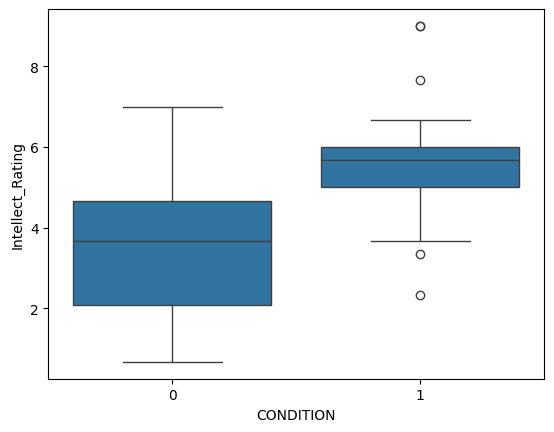

In [ ]:
import seaborn as sns
sns.boxplot(data=df,x='CONDITION',y='Intellect_Rating')

Pessoas análisadas por áudio costumam ser mais bem avalidas, sua grande maioria (50% dos dados) com um Intelect Rating entre 5 e 6. Com a presença de alguns outliers, mas nada que afete tanto a concentração das massas.

Já as por texto, além de notas mais baixas, costumam ser mais variadas. 50% dos dados estão entre 2 e 4, além de grandes caudas, que explicita a variedade das avaliações.

(iii) Aplique um teste de normalidade em ambas as amostras, Sa e St. Apresente uma análise do resultado obtido.

In [ ]:
# RESPOSTA AQUI

(iv) Construa um intervalo de confiança para a média de avaliações produzidas por duas populações distintas, P1 e P2, descritas abaixo.
- P1: todos os recrutadores que ouvem os áudios
- P2: todos os recrutadores que leem os transcritos

Note que a resposta a este item devem ser dois intervalos de confiança.
Nos dois casos, use o nível de confiança de 99%.

In [ ]:
# CONSTRUIR UM INTERVALO DE CONFIANCA 99% PARA A MÉDIA n<30

(v) Com base nos intervalos de confiança obtidos no item anterior, você
acha que a conclusão a que chegaram os autores em Schroeder and
Epley (2015) é válida? Justifique sua resposta

# RESPOSTA AQUI

#5) Intervalo de confiança para altura média
Essa parte do trabalho envolve computar um intervalo de confiança para a
média das alturas dos estudantes de uma universidade. Você deve realizar
essa parte do trabalho usando como amostra os dados contidos no conjunto de dados fornecido no arquivo survey.csv. Esse conjunto de dados contém
o resultado de uma pesquisa feita com uma amostra de estudantes em uma
universidade australiana. Os atributos desse conjunto de dados são descritos a seguir:

- Sex. O sexo do aluno. (Fator com os níveis Male e Female.)
- Wr.Hnd. vão (distância da ponta do polegar à ponta do dedo mínimo
da mão aberta) da mão que escreve, em centímetros.
- NW.Hnd. extensão da mão que não escreve.
- W.Hnd. mão de escrita. (Left ou Right.)
- Fold. ”Cruze os braços! Qual está no topo? (R on L, L on R, Neither.)
- Pulse. taxa de pulso do aluno (batimentos por minuto).
- Clap. ’Bata palmas! Qual mão está para cima? (Right, Left,None.)
- Exer. quantas vezes o aluno se exercita. (Freq (frequentemente), Some,
None.)
- Smoke. Quanto o aluno fuma. (Heavy, Regul (regularmente), Occas
(occasionalmente), Never.)
- Height. altura do aluno em centímetros.
- M.I. se o aluno expressou a altura em unidades imperiais (pés/polega-
das) ou métricas (centímetros/metros). (Metric, Imperial.)
- Age. Idade do aluno em anos.

No Python, o arquivo survey.csv deve ser carregado inicialmente. Você
pode fazer isso por meio da biblioteca Pandas, conforme exemplo na Lista-
gem 2.

Listagem 2: Carga do conjunto de dados survey em Python.
```
import pandas as pd
df_survey = pd.read_csv('survey.csv')
```

A variável de interesse está na coluna Height do conjunto de dados. Inicialmente, você deve eliminar valores faltantes (missing values) nessa coluna.

Para isso, pesquise sobre a função na.omit da linguagem R, ou sobre a
função drop.na da biblioteca Pandas em Python.
Agora, realize o que se pede a seguir



(i) Usando a distribuição t de Student, calcule um intervalo de confiança
no nível de 95% para a altura média dos estudantes da universidade

(ii) Construa outro intervalo de confiança, desta vez usando o z-score (em
vez do t-score que você usou anteriormente).

(iii) Apresente uma análise comparativa dos dois intervalos de confiança
obtidos.

#6) Intervalo de confiança para proporção
Nesta parte do trabalho, você deve considerar a mesma amostra contida
no conjunto de dados survey. Dessa vez, você deve produzir um intervalo
de confiança para a proporção de alunos da universidade que são canhotos.
Sendo assim, dessa vez a coluna de interesse é W.Hnd.

(i) Primeiramente, se certifique de que existem pelo menos 10 estudantes destros e pelo menos 10 estudantes canhotos, para que você possa realizar a construção do intervalo de confiança de forma satisfatória.

(ii) Produza o intervalo de confiança solicitado, usando o nível de confiança 90%. Junto com o resultado, forneça também uma análise.

## resposta aqui

(iii) Produza o intervalo de confiança solicitado, usando o nível de confiança 95%. Junto com o resultado, forneça também uma análise e compare
com o resultado obtido no item anterior.

# analise aqui

(iv) Repita os itens (i), (ii) e (iii), desta vez considerando o atributo Sex.

v) A amostra correspondente ao conjunto de dados survey tem tamanho
suficiente para produzir um intervalo de confiança para a característica
Sexo (coluna Sexo) com um erro amostral de 2 pontos percentuais?
Se sim, construa esse intervalo de confiança usando nível de confiança
90%. Se não, explique.

## reposta aqui